In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [100]:
df = pd.read_csv("Emirates .csv")
df.head()

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country
0,"""upgrade to business class""",12th August 2024,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates
1,"""14 hour horrendous experience""",11th August 2024,Trip Verified,NaN,Couple Leisure,Economy Class,Delhi to Boston via Dubai,August 2024,1.0,1.0,3.0,3.0,2.0,3.0,2,no,4,We were 2 people travelling together and on...,India
2,"""not welcome and passengers are a burden""",29th July 2024,Not Verified,Boeing 777-300,Solo Leisure,Economy Class,Amsterdam to Phuket via Dubai,June 2024,2.0,1.0,4.0,2.0,3.0,3.0,2,no,5,"First time flying Emirates, was expecting a...",Netherlands
3,"""should be considered among the worst""",18th July 2024,Trip Verified,A380,Business,Economy Class,Manchester to Singapore via Dubai,July 2024,1.0,1.0,2.0,NaN,NaN,1.0,1,no,1,Ground Staff and Service Failures on Flight ...,Singapore
4,“services are very great”,13th July 2024,Not Verified,A380,Family Leisure,Economy Class,Bangkok to Hong Kong,August 2023,5.0,5.0,5.0,5.0,4.0,5.0,5,yes,10,The staff are friendly and the seat is comfo...,Hong Kong


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1540 non-null   object 
 1   Date Published   1540 non-null   object 
 2   Status           1398 non-null   object 
 3   Aircraft         1037 non-null   object 
 4   Travel Type      1540 non-null   object 
 5   Travel Class     1540 non-null   object 
 6   Route            1538 non-null   object 
 7   Date Flown       1540 non-null   object 
 8   Seating Comfort  1477 non-null   float64
 9   Staff Service    1476 non-null   float64
 10  Food Quality     1418 non-null   float64
 11  Entertainment    1380 non-null   float64
 12  WiFi             934 non-null    float64
 13  Ground Service   1501 non-null   float64
 14  Value for Money  1540 non-null   int64  
 15  Recommended      1540 non-null   object 
 16  Overall Rating   1540 non-null   int64  
 17  Review        

In [104]:
df.describe()         

,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Overall Rating
count,1477.000000,1476.000000,1418.000000,1380.000000,934.000000,1501.00000,1540.000000,1540.000000
mean,3.223426,2.977642,3.000000,3.704348,2.751606,2.85010,2.819481,4.814286
std,1.401284,1.592836,1.476707,1.376108,1.478815,1.59233,1.534489,3.331275
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000,1.000000,1.00000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,4.000000,3.000000,3.00000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,5.000000,4.000000,4.00000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,10.000000


In [106]:
df.columns 

Index(['Title', 'Date Published', 'Status', 'Aircraft', 'Travel Type',
       'Travel Class', 'Route', 'Date Flown', 'Seating Comfort',
       'Staff Service', 'Food Quality', 'Entertainment', 'WiFi',
       'Ground Service', 'Value for Money', 'Recommended', 'Overall Rating',
       'Review', 'Country'],
      dtype='object')

In [108]:
df.shape  

(1540, 19)

In [110]:
df.isnull().sum()

Title                0
Date Published       0
Status             142
Aircraft           503
Travel Type          0
Travel Class         0
Route                2
Date Flown           0
Seating Comfort     63
Staff Service       64
Food Quality       122
Entertainment      160
WiFi               606
Ground Service      39
Value for Money      0
Recommended          0
Overall Rating       0
Review               0
Country              0
dtype: int64

In [112]:
df.dropna()  

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country
0,"""upgrade to business class""",12th August 2024,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates
2,"""not welcome and passengers are a burden""",29th July 2024,Not Verified,Boeing 777-300,Solo Leisure,Economy Class,Amsterdam to Phuket via Dubai,June 2024,2.0,1.0,4.0,2.0,3.0,3.0,2,no,5,"First time flying Emirates, was expecting a...",Netherlands
4,“services are very great”,13th July 2024,Not Verified,A380,Family Leisure,Economy Class,Bangkok to Hong Kong,August 2023,5.0,5.0,5.0,5.0,4.0,5.0,5,yes,10,The staff are friendly and the seat is comfo...,Hong Kong
10,"""I'd again chose EK economy""",20th June 2024,Not Verified,777-300ER / A380-800,Family Leisure,Economy Class,Delhi to Washington via Dubai,June 2024,5.0,5.0,5.0,5.0,3.0,5.0,4,yes,9,Having flown almost exclusely in business cla...,United States
17,“the worst airline I've ever flown”,26th May 2024,Trip Verified,B777-300ER,Solo Leisure,Economy Class,Tokyo to Israel via Dubai,May 2024,3.0,2.0,1.0,2.0,2.0,1.0,1,no,1,"I fly a lot, but Emirates were my worst exper...",Israel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,"""excellent customer service""",31st March 2016,Verified Review,A380,Business,Business Class,SYD to AKL,March 2016,5.0,5.0,4.0,3.0,5.0,5.0,4,yes,9,"Sydney to Auckland, and Emirates offers exce...",Australia
1440,"""professional smiling crews""",30th March 2016,Verified Review,A380,Solo Leisure,Business Class,MXP to JFK,March 2016,4.0,5.0,4.0,4.0,4.0,4.0,4,yes,9,Milan Malpensa to New York JFK return in bus...,Italy
1443,"""service was really bare bones""",25th March 2016,Verified Review,A380,Solo Leisure,Economy Class,LHR to MEL via DXB,March 2016,2.0,3.0,2.0,5.0,1.0,5.0,4,no,4,Tried Emirates for the first time from Londo...,United Kingdom
1444,"""crew can make the difference""",25th March 2016,Verified Review,Boeing 777,Solo Leisure,Economy Class,CMN to CMB via DXB/MLE,March 2016,5.0,3.0,5.0,5.0,5.0,4.0,4,yes,7,Casablanca to Colombo via Dubai and Male wit...,Sri Lanka


In [114]:
df.tail()

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country
1535,"""very disappointing flight""",31st December 2015,NaN,NaN,Solo Leisure,Economy Class,DUR to MAN via DXB,December 2015,1.0,3.0,1.0,2.0,4.0,4.0,1,no,4,Durban to Manchester via Dubai. Very disappoin...,United Kingdom
1536,"""not that impressed""",31st December 2015,NaN,Boeing 777-300ER,Couple Leisure,Business Class,BHX to DXB,December 2015,4.0,5.0,2.0,1.0,NaN,3.0,3,yes,4,Birmingham to Dubai and I was not that impress...,United Kingdom
1537,"""staff was impeccable""",28th December 2015,NaN,A380,Family Leisure,Economy Class,BNE to LHR via DXB,June 2015,4.0,5.0,4.0,5.0,2.0,4.0,4,yes,9,I have a serious phobia of flying. I flew Emir...,Australia
1538,"""new plane and great staff""",23rd December 2015,NaN,A380,Business,Economy Class,DXB to JED,November 2015,5.0,5.0,2.0,5.0,NaN,5.0,5,yes,9,Dubai to Jeddah in November on an A380. New pl...,Spain
1539,"""very average experience""",22nd December 2015,NaN,A380,Family Leisure,First Class,BKK to HKG,December 2015,5.0,3.0,3.0,5.0,5.0,5.0,4,yes,7,This was the return sector of my trip. Check i...,Hong Kong


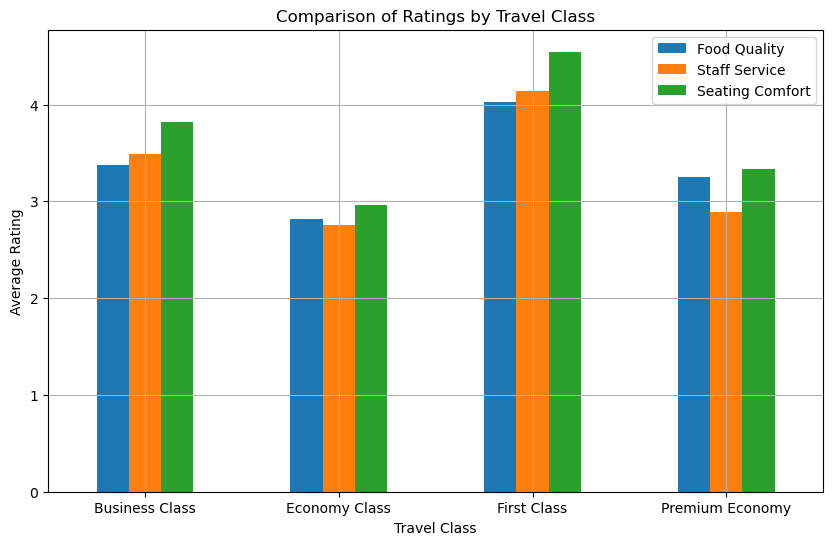

In [117]:
grouped = df.groupby("Travel Class")[["Food Quality", "Staff Service", "Seating Comfort"]].mean()

# Plot a bar chart
grouped.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Ratings by Travel Class")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("your_dataset.csv")  # Replace with your actual file path

# Step 1: Calculate total rating by summing selected columns
rating_columns = [
    'Seating Comfort', 'Staff Service', 'Food Quality',
    'Entertainment', 'WiFi', 'Ground Service', 'Value for Money'
]

df['Total Rating'] = df[rating_columns].mean(axis=1)  # or use sum(axis=1)

# Step 2: Group by Aircraft and calculate average total rating
aircraft_rating = df.groupby('Aircraft')['Total Rating'].mean().sort_values(ascending=False)

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=aircraft_rating.index, y=aircraft_rating.values, palette="viridis")
plt.title('Average Total Rating by Aircraft Type')
plt.ylabel('Average Rating (0-5)')
plt.xlabel('Aircraft')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
